In [69]:
from collections import Counter
import numpy as np
from visualize_events.snomed import *

T = load_tree()
T.attr_label()
avg_parents = np.mean([len(n.parents) for n in T.concept_to_node.values()])
c = Counter([par for n in T.traverse(raise_on_visited=False, yield_first_visit=True, yield_visited=False) for par in n.parents])


print(avg_parents)
T.remove_other_roots(verbose=True)
avg_parents = np.mean([len(n.children) for n in T.concept_to_node.values()])
print(avg_parents)
T.make_tree(mode='most_popular_parent')
assert T.is_tree()

Some parent nodes not found as dataframe indices


1.9179225202213708
Removed 43 nodes.
1.9232609810288839


In [2]:
[str(a[0]) for a in c.most_common(10)]

['Soft tissue lesion',
 'Disease',
 'Inflammation of specific body organs',
 'Clinical finding',
 'Functional finding',
 'Degenerative disorder',
 'Traumatic injury',
 'Disorder of brain',
 'Bleeding',
 'Disorder of skin']

Some parent nodes not found as dataframe indices


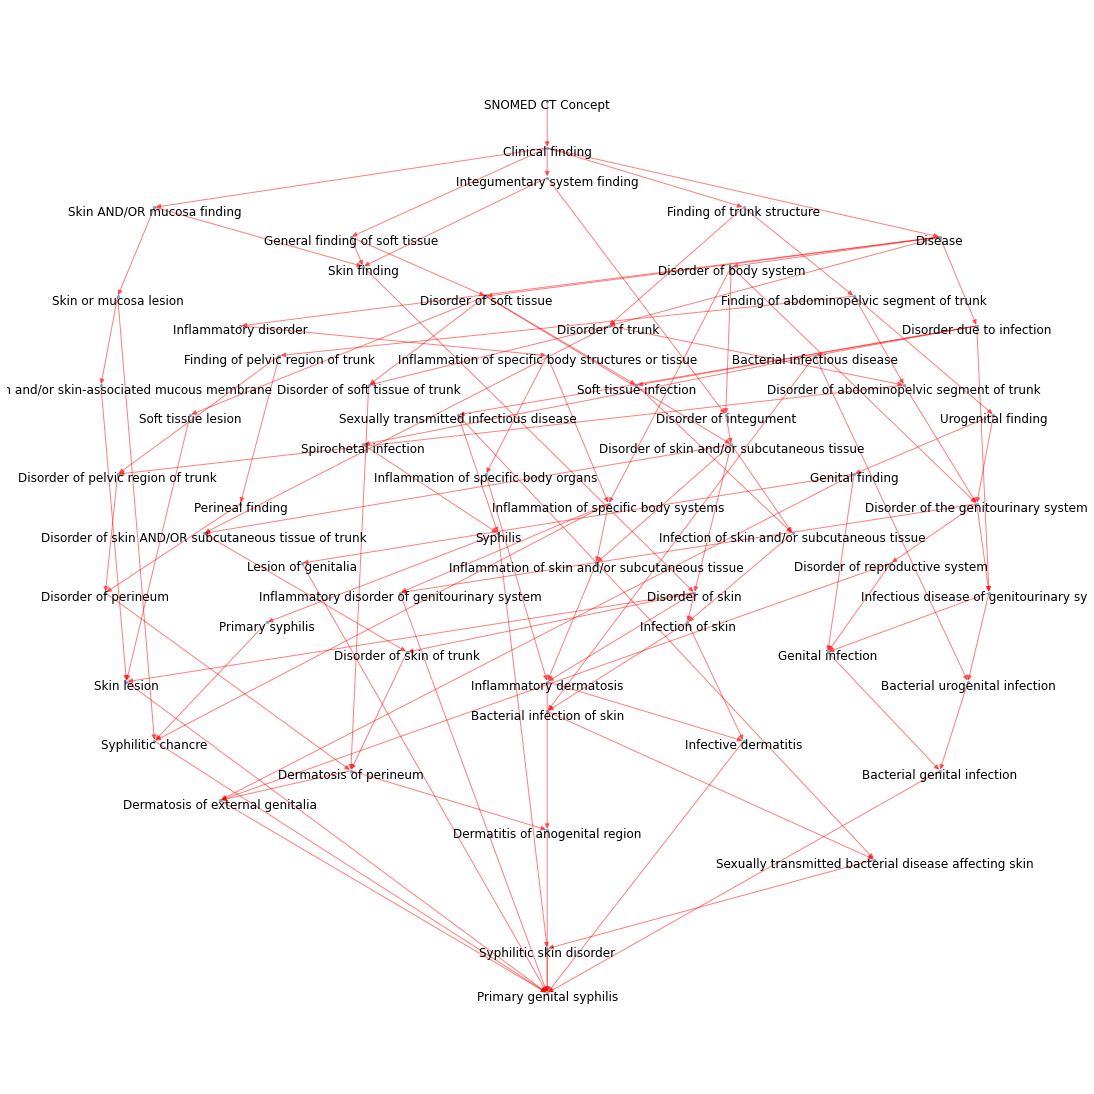

In [5]:
import matplotlib.pyplot as plt
T = load_tree()
T.attr_label()
n = T.concept_to_node[128121009]
x = n.children[2].children[1].children[1].children[0]
plt.figure(figsize=(15,15))
draw_subgraph_to_leaf(x, T)

Facial swelling
Attention seeking behavior
Facial swelling
Attention seeking behavior
Dental plaque
Abnormal glucose tolerance test
Ectopia cordis
Secondary malignant neoplasm of thyroid gland


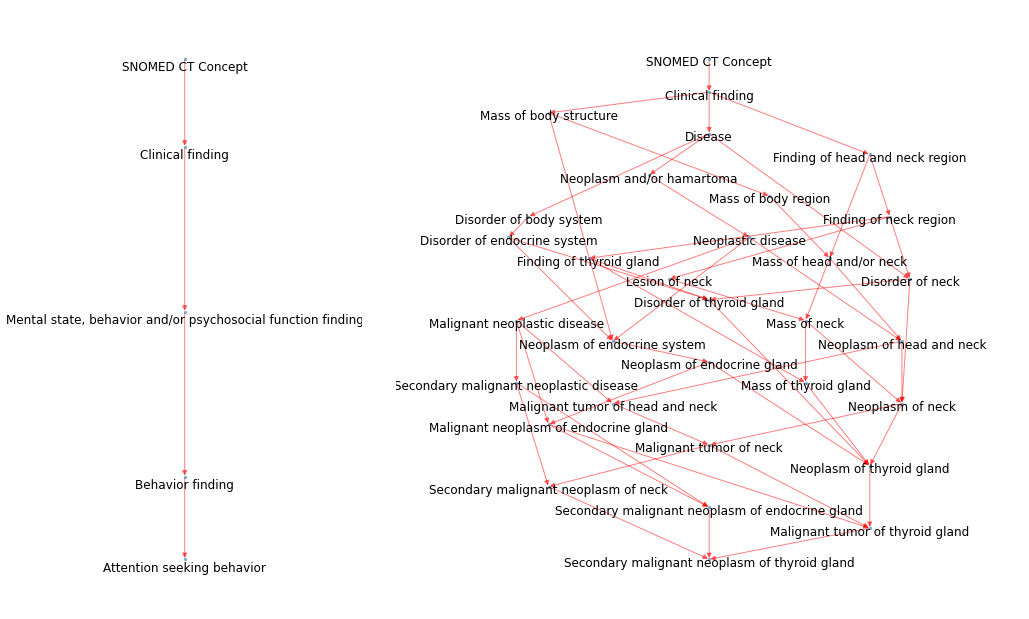

In [64]:
Is = []
for I in [1, 5]:
    i = 0
    for k in T.concept_to_node:
        n = T.concept_to_node[k]
        if len(n.children) == 0:
            print(n)
            if i == I:
                x = n
                break
            i += 1
    Is.append(x)

fig, axs = plt.subplots(1, 2, figsize=(14.4, 9), gridspec_kw={'width_ratios': [1.7, 3]})

plt.xlim([-1.3, 1.3])
draw_subgraph_to_leaf(Is[0], T, ax=axs[0])
plt.tight_layout()
# plt.savefig(f"example_{Is[0]}.pdf", dpi=600)

# plt.figure(figsize=(9,7))
# plt.xlim([-1.3, 1.3])
draw_subgraph_to_leaf(Is[1], T, ax=axs[1])
# plt.tight_layout()
plt.savefig(f"examples.pdf", dpi=600)

In [ ]:
from ete3 import Tree, TreeStyle

circular_style = TreeStyle()
circular_style.rotation=0
circular_style.mode = "r" # draw tree in circular mode
t = T.get_newick()
t = Tree(t, format=8, quoted_node_names=True)
t.render("mytree.png", w=183, units="mm", dpi=1500, tree_style=circular_style)
print("Done")

In [ ]:
import matplotlib.pyplot as plt
import pydot
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [ ]:
edges = [
    (node.name, child.name) for node in anc for child in node.children
]

In [ ]:
draw_subgraph_to_leaf(x, T)

In [ ]:
[str(a) for a in anc]

In [ ]:
print([
    nx.is_tree(G),
    nx.is_forest(G),
    nx.is_arborescence(G),
    nx.is_branching(G),
])

In [ ]:
T.root.children

In [ ]:
[str(c) for c in T.root.children[0].children]